In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
% matplotlib inline


In [2]:
def build_filters():
    filters = []
    ksize = [3, 5, 7, 9, 11, 13, 15, 17]  # gabor尺度，共8个
    sigma = np.arange(2, len(ksize) + 2)
    lambd = np.arange(3, len(ksize) + 3)

    for theta in np.arange(0, np.pi, np.pi / 8):  # gabor方向 0 45 90 135
        for k in range(len(ksize)):
            kern = cv2.getGaborKernel((ksize[k], ksize[k]), sigma[k], theta, lambd[k], 0.5, 0, ktype=cv2.CV_32F)
            filters.append(kern)
    return filters
def gabor_process(img,filters): 
    process_imgs = []
    for kern in filters: 
        fimg = cv2.filter2D(img,cv2.CV_8UC1,kern) 
        process_imgs.append(fimg)
    return process_imgs


# 显示滤波器核

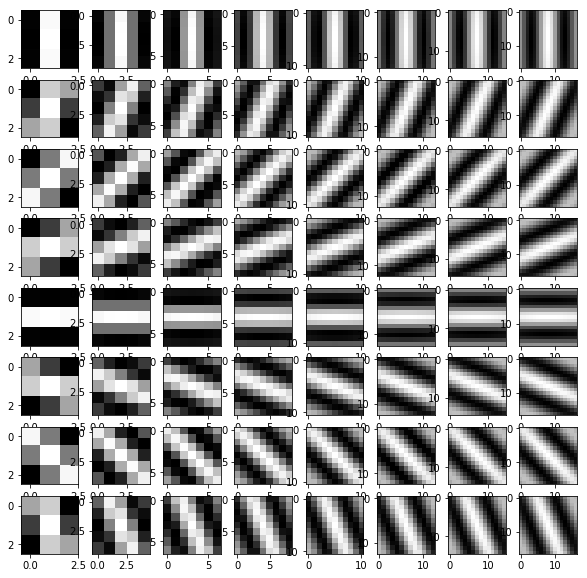

In [3]:
filters = build_filters()
plt.figure(figsize=(10, 10))
for r_i in range(8):
    for c_i in range(8):
        plt.subplot(8, 8, r_i * 8 + c_i + 1)
        plt.imshow(filters[r_i * 8 + c_i], cmap='gray')


# 加载测试集

In [4]:
train_data = pd.read_csv("../data/train_data.csv", dtype=np.uint8)
train_images = train_data.drop("target",axis = 1)
train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


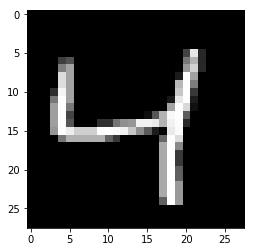

In [5]:
image = train_images.loc[2].values.reshape(28,28)
plt.imshow(image, cmap='gray')

# 显示滤波处理之后的图片

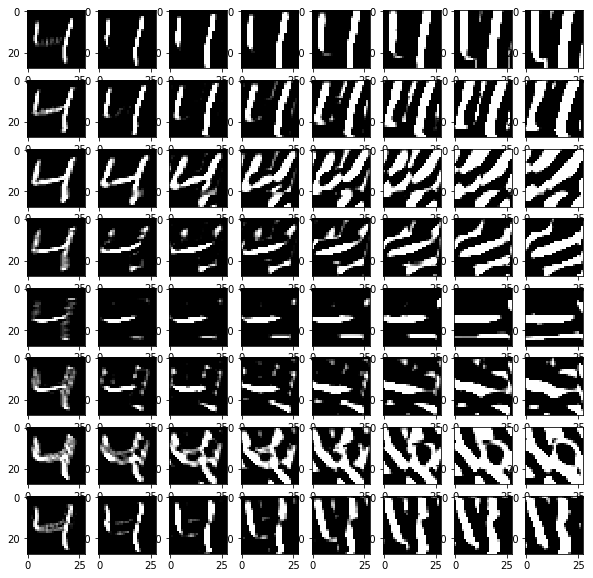

In [6]:
process_imgs = gabor_process(image,filters)
plt.figure(figsize=(10, 10))
for r_i in range(8):
    for c_i in range(8):
        plt.subplot(8, 8, r_i * 8 + c_i + 1)
        plt.imshow(process_imgs[r_i * 8 + c_i], cmap='gray')